In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import (
    gamma, poisson, linregress, norm, skew, lognorm,
    truncpareto
)
from scipy.stats import invgamma as ig
from scipy.integrate import cumulative_trapezoid, trapezoid
from scipy.special import gammainc
from scipy.special import gamma as gf
from scipy.special import beta as bf
from scipy.special import betaln as lnbf
from scipy.special import betainc as regincbf
from scipy.signal import fftconvolve, savgol_filter
import math
import time
import random
import pickle as pkl
from scipy import optimize
from cratersfd import *
import ash
%matplotlib inline

plt.rcParams['font.family'] = 'Helvetica'

In [21]:
dmin = 2.0
dmax = 1E4
N = 500
synth_d_list = synth_fixed_N(N=N, dmin=dmin, pf=npf_new_loglog)
# ds = random.choice(synth_d_list[0])
ds = np.loadtxt('saved/sash_figure_ds.csv', delimiter=',')
area = 1E6

7e-05 seconds
Calculation time: 0.00012 seconds
Calculation time: 0.00021 seconds
Calculation time: 0.00019 seconds
Calculation time: 0.00097 seconds
Calculation time: 0.00164 seconds


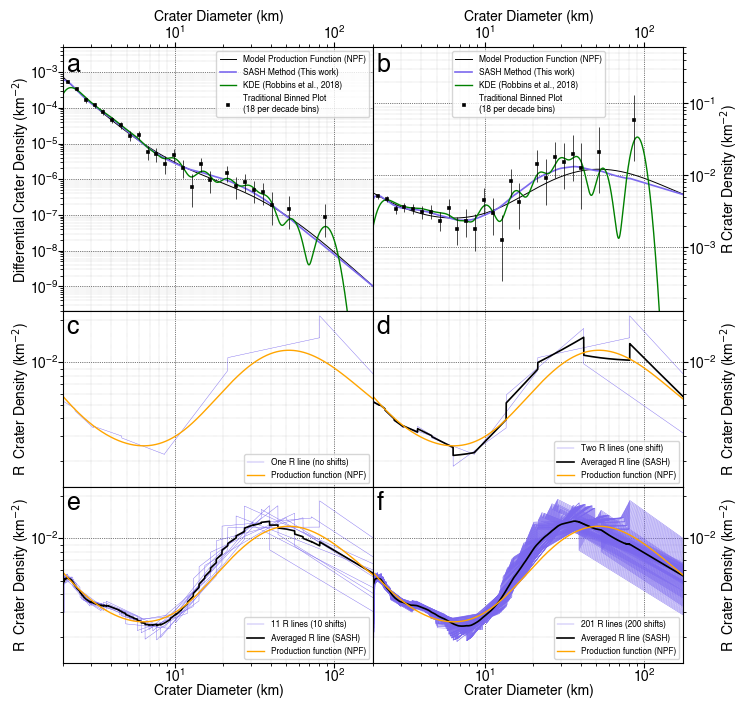

In [43]:
fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(7, 2, figure=fig)

letter_count = 0
def add_letter():
    global letter_count
    plt.text(
        0.01, 0.98, chr(ord('a') + letter_count),
        transform=ax.transAxes, ha='left', va='top',
        size=18
    )
    letter_count += 1

def sash_fig(
    bin_width_exponent=per_decade(18), 
    d_max=10 * np.max(ds), 
    growth_rate=1.3, n_points=10000, n_shifts=200,
    color='black', plot_lines=True, lw=1.2,
    line_color='mediumslateblue', line_lw=0.3,
    min_count=1, n_iterations=5,
    n_alpha_points=1000, plot_error=False,
    fontsize=10, on_top=False, on_right=False,
    delete=False
):
    X, mean_Y = plot_sash_R(
        ds, area, dmin, 
        **match_kwargs(locals(), plot_sash_R)
    )
    sash_lines = plt.gca().get_lines()
    if len(sash_lines) == 2:
        lines = [sash_lines[0]]
    else:
        lines = [sash_lines[0], sash_lines[-1]]
    plot_npf_R_N(
        ds.size, area, dmin=dmin, lw=1.0, color='orange'
    )
    lines += plt.gca().get_lines()[-1:]
    plt.xlim([dmin, 2 * np.max(ds)])
    plt.ylim([1.3E-3, 2.3E-2])
    if on_right:
        ax.yaxis.labelpad = 1
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
    else:
        ax.yaxis.labelpad = -1
    ax.tick_params(axis='both', which='major', pad=0)
    if on_top:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        ax.xaxis.labelpad = 3
    else:
        ax.xaxis.labelpad = -1
    if delete:
        ax_lines = ax.get_lines()
        ax_lines[1].remove()
        ax_lines[2].remove()
        lines = plt.gca().get_lines()
        line_labels = [
            'One R line (no shifts)',
            'Production function (NPF)'
        ]
    elif n_shifts == 1:
        line_labels = [
            'Two R lines (one shift)',
            'Averaged R line (SASH)',
            'Production function (NPF)'
        ]
    else:
        line_labels = [
            (
                str(n_shifts + 1) + ' R lines '
                '(' + str(n_shifts) + ' shifts)'
            ),
            'Averaged R line (SASH)',
            'Production function (NPF)'
        ]
    plt.legend(lines, line_labels, fontsize=6)
    add_letter()

ax = fig.add_subplot(gs[:3, 0])

plot_npf_dif_N(
    ds.size, area, dmin=dmin, lw=0.7, color='black'
)
X, mean_Y = plot_sash(
    ds, area, dmin, 
    bin_width_exponent=per_decade(18), 
    d_max=10 * np.max(ds), 
    growth_rate=1.3, n_points=10000, n_shifts=200,
    color='mediumslateblue', plot_lines=False, lw=1.2,
    line_color='mediumslateblue', line_lw=0.2,
    min_count=1, n_iterations=5,
    n_alpha_points=1000, plot_error=False
)
plot_kde(ds, area, d_min=1.0, color='green', lw=1.0)
plot_differential(
    ds, area, bin_width_exponent=per_decade(18),
    d_min=dmin, d_max=1E4, min_count=0, ms=2,
    fontsize=10
)
plt.xlim([dmin, 2 * np.max(ds)])
plt.ylim([2E-10, 5E-3])
np.flip(np.sort(ds))[:10]

lines = plt.gca().get_lines()

plt.legend(lines, [
    'Model Production Function (NPF)',
    'SASH Method (This work)',
    'KDE (Robbins et al., 2018)',
    'Traditional Binned Plot\n(18 per decade bins)'
], fontsize=6)
ax.tick_params(axis='both', which='major', pad=0)
ax.yaxis.labelpad = -1
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.xaxis.labelpad = 3

add_letter()

ax = fig.add_subplot(gs[:3, 1])

plot_npf_R_N(
    ds.size, area, dmin=dmin, lw=0.7, color='black'
)
X, mean_Y = plot_sash_R(
    ds, area, dmin, 
    bin_width_exponent=per_decade(18), 
    d_max=10 * np.max(ds), 
    growth_rate=1.3, n_points=10000, n_shifts=200,
    color='mediumslateblue', plot_lines=False, lw=1.2,
    line_color='mediumslateblue', line_lw=0.2,
    min_count=1, n_iterations=5,
    n_alpha_points=1000, plot_error=False
)
plot_kde_R(ds, area, d_min=1.0, color='green', lw=1.0)
plot_R(
    ds, area, bin_width_exponent=per_decade(18),
    d_min=dmin, d_max=1E4, min_count=0, ms=2,
    fontsize=10
)
plt.xlim([dmin, 2 * np.max(ds)])
plt.ylim([1.3E-4, 6E-1])
np.flip(np.sort(ds))[:10]

lines = plt.gca().get_lines()

plt.legend(lines, [
    'Model Production Function (NPF)',
    'SASH Method (This work)',
    'KDE (Robbins et al., 2018)',
    'Traditional Binned Plot\n(18 per decade bins)'
], fontsize=6, loc='upper center')
ax.yaxis.labelpad = 1
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.tick_params(axis='both', which='major', pad=0)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.xaxis.labelpad = 3

add_letter()

ax = fig.add_subplot(gs[3:5, 0])

sash_fig(
    n_shifts=1, color='mediumslateblue', lw=0.3,
    delete=True
)

ax = fig.add_subplot(gs[3:5, 1])

sash_fig(n_shifts=1, on_right=True)

ax = fig.add_subplot(gs[5:7, 0])

sash_fig(n_shifts=10)

ax = fig.add_subplot(gs[5:7, 1])

sash_fig(n_shifts=200, on_right=True)

plt.subplots_adjust(wspace=0, hspace=0)
f = 'figs/sash_figure.pdf'
plt.gcf().savefig(f, bbox_inches='tight')

Calculation time: 0.00016 seconds
Calculation time: 0.00012 seconds
Calculation time: 0.00012 seconds
Calculation time: 0.00011 seconds
Calculation time: 0.00013 seconds
Calculation time: 0.00013 seconds
Calculation time: 0.00012 seconds
Calculation time: 0.00012 seconds
Calculation time: 0.00011 seconds
Calculation time: 0.00012 seconds
Calculation time: 0.00011 seconds
Calculation time: 0.00011 seconds


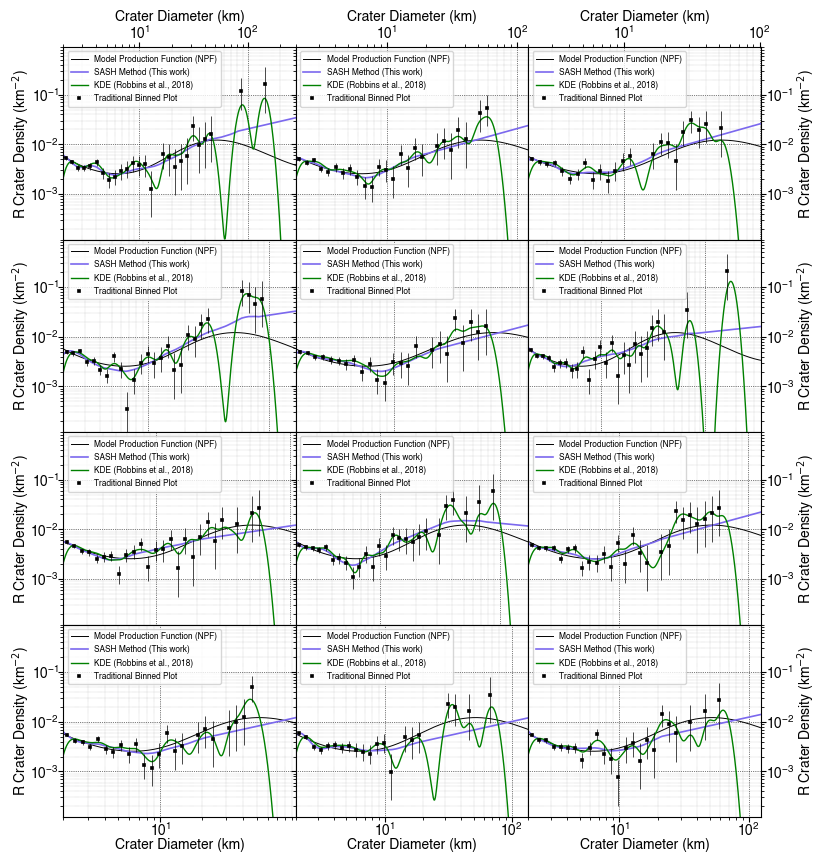

In [45]:
fig = plt.figure(figsize=(9, 10))

def sash_comparison_R_plot(i):

    ds = synth_d_list[0][i]
    
    plot_npf_R_N(
        ds.size, area, dmin=dmin, lw=0.7, color='black'
    )
    X, mean_Y = plot_sash_R(
        ds, area, dmin, 
        bin_width_exponent=per_decade(18), 
        d_max=10 * np.max(ds), 
        growth_rate=1.3, n_points=10000, n_shifts=200,
        color='mediumslateblue', plot_lines=False, lw=1.2,
        line_color='mediumslateblue', line_lw=0.2,
        min_count=1, n_iterations=5,
        n_alpha_points=1000, plot_error=False
    )
    plot_kde_R(ds, area, d_min=1.0, color='green', lw=1.0)
    plot_R(
        ds, area, bin_width_exponent=per_decade(18),
        d_min=dmin, d_max=1E4, min_count=0, ms=2,
        fontsize=10
    )
    plt.xlim([dmin, 2 * np.max(ds)])
    plt.ylim([1.2E-4, 9E-1])
    np.flip(np.sort(ds))[:10]
    
    lines = plt.gca().get_lines()
    
    plt.legend(lines, [
        'Model Production Function (NPF)',
        'SASH Method (This work)',
        'KDE (Robbins et al., 2018)',
        'Traditional Binned Plot'
    ], fontsize=6, loc='upper left')

    ax = plt.gca()
    if i % 3 == 0:
        ax.yaxis.labelpad = -1
    if i % 3 == 1:
        ax.set_ylabel(None)
        ax.tick_params(axis='y', which='both', labelleft=False)
    if i % 3 == 2:
        ax.yaxis.labelpad = 1
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
    if i < 3:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        ax.xaxis.labelpad = 3
    if i > 8:
        ax.xaxis.labelpad = -1
        
    ax.tick_params(axis='both', which='major', pad=0)
    
    # add_letter()

for i in range(12):
    fig.add_subplot(4, 3, i + 1)
    sash_comparison_R_plot(i)

plt.subplots_adjust(wspace=0, hspace=0)
f = 'figs/sash_synths_figure.pdf'
plt.gcf().savefig(f, bbox_inches='tight')

6e-05 seconds


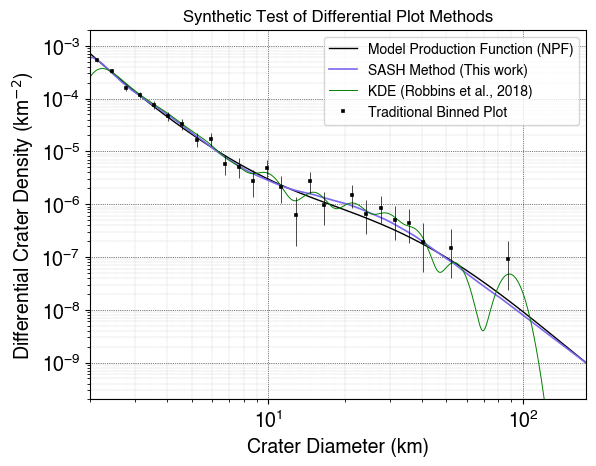

In [46]:
plot_npf_dif_N(
    ds.size, area, dmin=dmin, lw=1, color='black'
)
X, mean_Y = plot_sash(
    ds, area, dmin, 
    bin_width_exponent=per_decade(18), 
    d_max=10 * np.max(ds), 
    growth_rate=1.3, n_points=10000, n_shifts=200,
    color='mediumslateblue', plot_lines=False, lw=1.2,
    line_color='mediumslateblue', line_lw=0.2,
    min_count=1, n_iterations=5,
    n_alpha_points=1000, plot_error=False
)
plot_kde(ds, area, d_min=1.0, color='green', lw=0.7)
plot_differential(
    ds, area, bin_width_exponent=per_decade(18),
    d_min=dmin, d_max=1E4, min_count=0, ms=2
)
plt.xlim([dmin, 2 * np.max(ds)])
plt.ylim([2E-10, 2E-3])
np.flip(np.sort(ds))[:10]

lines = plt.gca().get_lines()

plt.legend(lines, [
    'Model Production Function (NPF)',
    'SASH Method (This work)',
    'KDE (Robbins et al., 2018)',
    'Traditional Binned Plot'
])

plt.title('Synthetic Test of Differential Plot Methods')
# plt.xlim([2, 7])
# plt.ylim([1E-2, 9E-1])
plt.gcf().savefig('figs/sash_test.pdf', bbox_inches='tight')

Calculation time: 0.00029 seconds


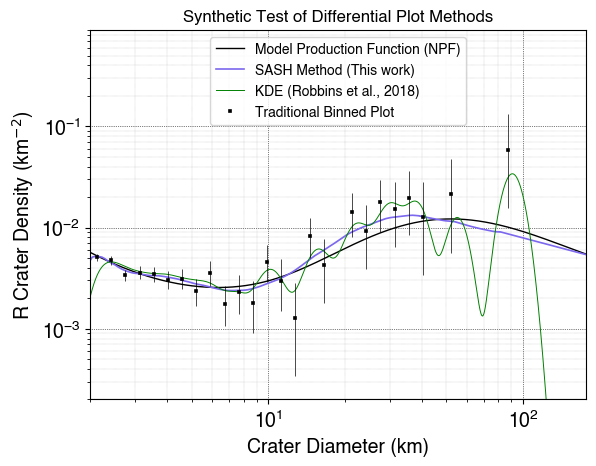

In [47]:
plot_npf_R_N(
    ds.size, area, dmin=dmin, lw=1, color='black'
)
X, mean_Y = plot_sash_R(
    ds, area, dmin, 
    bin_width_exponent=per_decade(18), 
    d_max=10 * np.max(ds), 
    growth_rate=1.3, n_points=10000, n_shifts=200,
    color='mediumslateblue', plot_lines=False, lw=1.2,
    line_color='mediumslateblue', line_lw=0.2,
    min_count=1, n_iterations=5,
    n_alpha_points=1000, plot_error=False
)
plot_kde_R(ds, area, d_min=1.0, color='green', lw=0.7)
plot_R(
    ds, area, bin_width_exponent=per_decade(18),
    d_min=dmin, d_max=1E4, min_count=0, ms=2
)
plt.xlim([dmin, 2 * np.max(ds)])
plt.ylim([2E-4, 9E-1])
np.flip(np.sort(ds))[:10]

lines = plt.gca().get_lines()

plt.legend(lines, [
    'Model Production Function (NPF)',
    'SASH Method (This work)',
    'KDE (Robbins et al., 2018)',
    'Traditional Binned Plot'
], loc='upper center')

plt.title('Synthetic Test of Differential Plot Methods')
# plt.xlim([2, 7])
# plt.ylim([1E-2, 9E-1])
plt.gcf().savefig('figs/sash_test_R.pdf', bbox_inches='tight')